Import the appropriate libraries numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set frequency list (in Hz).

In [2]:
Hz = np.array([40, 45, 114, 86, 84, 82, 83, 85, 110, 112])

Set array of durations.

In [3]:
dt = [0.25, 10., 1.5]

Set the inverse of the cadence.

In [4]:
inv_cadence = 5000

Create a dictionary of times for each duration.

In [5]:
t = {}
for d in dt:
    t[d] = np.linspace(0, d, int(d * inv_cadence))

Create the light curves.

In [6]:
s = {}
for d in dt:
    s[d] = np.zeros(t[d].shape[0])
    for H in Hz:
        s[d] = np.add(s[d], np.sin(H * 2. * np.pi * t[d]))

Plot the light curves.

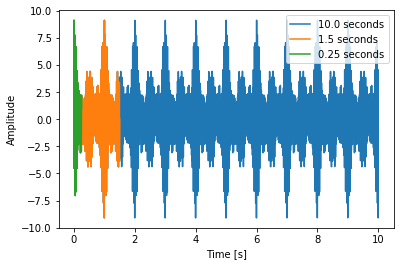

In [7]:
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
for key in reversed(sorted(s.keys())):
    plt.plot(t[key], s[key], label = str(key) + ' seconds')
plt.legend (loc='upper right')
plt.show()

Compute fourier transforms of the lightcurves, each with their own unique size and cutoff frequency

In [8]:
f = {}
fft = {}
N = {}
for key in s:
    T = t[key][1] - t[key][0]
    N[key] = s[key].shape[0]
    f[key] = np.linspace(0, 1 / T, N[key])
    fft[key] = np.fft.fft(s[key])

Plot the normalized fft of each lightcurve (notice the increasing resolution)

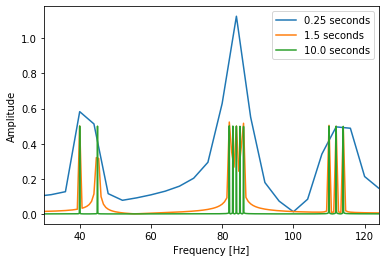

In [9]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.xlim(min(Hz) - 10, max(Hz) + 10)
for key in sorted(s.keys()):
    plt.plot(f[key][:N[key] // 2], np.abs(fft[key])[:N[key] // 2]*1/N[key], label = str(key) + ' seconds')
plt.legend (loc='upper right')
plt.show()